In this first block of code, we will simulate Grover's Algorithm for 4 qubits with 1 solution '1110'.
To implement Grover's algorithm we will need a circuit with n qubits representing the input space, and 1 auxiliary qubit to mark the solutions.


┌───┐     ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
q_0: ┤ H ├─────┤0             ├┤0             ├┤0             ├┤0             ├»
     ├───┤     │              ││              ││              ││              │»
q_1: ┤ H ├─────┤1             ├┤1             ├┤1             ├┤1             ├»
     ├───┤     │              ││              ││              ││              │»
q_2: ┤ H ├─────┤2 circuit-169 ├┤2 circuit-172 ├┤2 circuit-175 ├┤2 circuit-178 ├»
     ├───┤     │              ││              ││              ││              │»
q_3: ┤ H ├─────┤3             ├┤3             ├┤3             ├┤3             ├»
     ├───┤┌───┐│              ││              ││              ││              │»
q_4: ┤ X ├┤ H ├┤4             ├┤4             ├┤4             ├┤4             ├»
     └───┘└───┘└──────────────┘└──────────────┘└──────────────┘└──────────────┘»
c: 4/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌──────────────┐┌──────────────┐┌─┐         
«q_0: ┤0             ├┤0             ├┤M├─────────
«     │              ││              │└╥┘┌─┐      
«q_1: ┤1             ├┤1             ├─╫─┤M├──────
«     │              ││              │ ║ └╥┘┌─┐   
«q_2: ┤2 circuit-181 ├┤2 circuit-184 ├─╫──╫─┤M├───
«     │              ││              │ ║  ║ └╥┘┌─┐
«q_3: ┤3             ├┤3             ├─╫──╫──╫─┤M├
«     │              ││              │ ║  ║  ║ └╥┘
«q_4: ┤4             ├┤4             ├─╫──╫──╫──╫─
«     └──────────────┘└──────────────┘ ║  ║  ║  ║ 
«c: 4/═════════════════════════════════╩══╩══╩══╩═
«                                      0  1  2  3

{'0101': 2, '1110': 987, '0001': 2, '1010': 3, '1101': 5, '0111': 3, '1000': 2, '0110': 2, '1011': 2, '1111': 3, '1100': 1, '0010': 2, '0000': 4, '0100': 3, '0011': 1, '1001': 2}


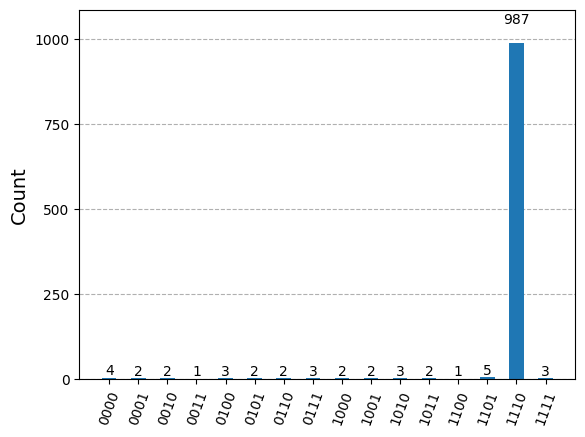

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
import matplotlib.pyplot as plt
from qiskit.circuit.library import MCXGate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def oracle():
    qc = QuantumCircuit(5)
    """
    #qc.x(0)
    qc.ccx(0, 1, 4)
    qc.ccx(2, 4, 5)
    qc.ccx(3, 5, 6)
    qc.ccx(2, 4, 5)
    qc.ccx(0, 1, 4)
    #qc.x(0)
    """
    qc.x(0)
    mcx = MCXGate(num_ctrl_qubits=4)
    qc.append(mcx, list(range(5)))
    qc.x(0)
    
    
    return qc

# Define the Grover's diffusion operator
def diffusion_operator():
    qc = QuantumCircuit(5)
    qc.h(range(4))
    qc.x(range(4))
    mcx = MCXGate(num_ctrl_qubits=4)
    qc.append(mcx, list(range(5)))
    qc.x(range(4))
    qc.h(range(4))
    return qc

# Create the Grover's algorithm circuit
grover_circuit = QuantumCircuit(5, 4)

# Initialize the qubits to a uniform superposition state
grover_circuit.h(range(4))

grover_circuit.x(4)
grover_circuit.h(4)
# Append the oracle and diffusion operator
r = int(np.floor(np.pi/4*np.sqrt(2**(4))))
for i in range(r):
    oracle_gate = oracle().to_gate()
    grover_circuit.append(oracle_gate, range(5))
    
    diffusion_gate = diffusion_operator().to_gate()
    grover_circuit.append(diffusion_gate, range(5))

# Measure the qubits
grover_circuit.measure(range(4), range(4))
grover_circuit.draw()
# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
#transpiled_circuit = transpile(grover_circuit, backend)

nc = transpile(grover_circuit,backend)
job = backend.run(nc)
result = job.result()


# Get the counts of the measurement results
counts = result.get_counts(grover_circuit)

# Print and plot the results
print(counts)
plot_histogram(counts)
plt.show()

Now we will write a function for Grover's algortihm with as input the number of input qubits, and an array of arrays representing the solutions.

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from qiskit.visualization import plot_bloch_multivector

InteractiveShell.ast_node_interactivity = "all"

def grover(n_bits, solutions):
    
    oracle, osv = oracle_operator(n_bits, solutions)
    diffusor, dsv = diffusion_operator(n_bits)
    
    grover_circuit = QuantumCircuit(n_bits+1, n_bits)

    # Initialize the qubits to a uniform superposition state
    grover_circuit.h(range(n_bits))
    
    grover_circuit.x(n_bits)
    grover_circuit.h(n_bits)
    # Append the oracle and diffusion operator
    r = int(np.floor(np.pi/4*np.sqrt(2**n_bits/len(solutions))))
    
    for i in range(r):
        oracle_gate = oracle.to_gate()
        grover_circuit.append(oracle_gate, range(n_bits+1))
        
        diffusion_gate = diffusor.to_gate()
        grover_circuit.append(diffusion_gate, range(n_bits+1))
    
    # Measure the qubits
    grover_circuit.measure(range(n_bits), range(n_bits))
    grover_circuit.draw()
    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    #transpiled_circuit = transpile(grover_circuit, backend)
    
    nc = transpile(grover_circuit,backend)
    job = backend.run(nc)
    result = job.result()
    
    
    # Get the counts of the measurement results
    counts = result.get_counts(grover_circuit)
    
    # Print and plot the results
    print(counts)
    plot_histogram(counts)
    plt.show()
    return counts, osv, dsv

def oracle_operator(n_bits, solutions):
    qc = QuantumCircuit(n_bits+1)

    for solution in solutions:
        save = []
        for i in range(n_bits):
            if not solution[-1-i]:
                qc.x(i)
                save.append(i)
                
        mcx = MCXGate(num_ctrl_qubits=n_bits)
        qc.append(mcx, list(range(n_bits+1)))
        
        for i in save:
            qc.x(i)
            
    backend = Aer.get_backend("statevector_simulator")
    nc = transpile(qc,backend)
    job = backend.run(nc)
    result = job.result()
    statevec = result.get_statevector()
            
    return qc, statevec

# Define the Grover's diffusion operator
def diffusion_operator(n_bits):
    qc = QuantumCircuit(n_bits+1)
    qc.h(range(n_bits))
    qc.x(range(n_bits))
    mcx = MCXGate(num_ctrl_qubits=n_bits)
    qc.append(mcx, list(range(n_bits+1)))
    qc.x(range(n_bits))
    qc.h(range(n_bits))

    backend = Aer.get_backend("statevector_simulator")
    nc = transpile(qc,backend)
    job = backend.run(nc)
    result = job.result()
    statevec = result.get_statevector()
    
    return qc, statevec





In the next code block we will run the algorithm.

{'11010': 1, '00000': 353, '10111': 350, '01010': 320}


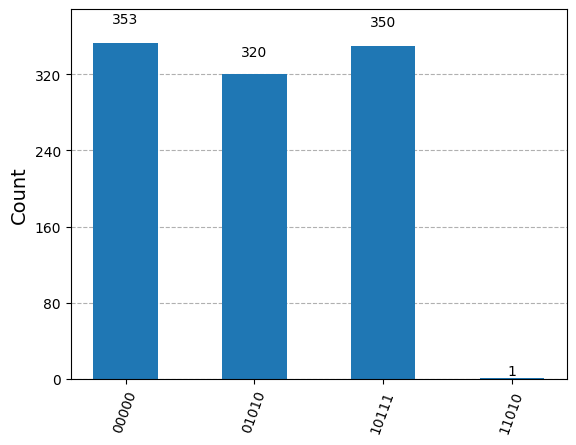

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
counts, osv, dsv = grover(5, [[1,0,1,1,1],[0,0,0,0,0],[0,1,0,1,0]])
plot_histogram(counts)
plt.show()

NOW WITH ORACLE SET_UP TO SEE STATEVECS

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from qiskit.visualization import plot_bloch_multivector

InteractiveShell.ast_node_interactivity = "all"

def grover(n_bits, solutions):
    
    grover_circuit = QuantumCircuit(n_bits+1, n_bits)

    # Initialize the qubits to a uniform superposition state
    grover_circuit.h(range(n_bits))
    
    grover_circuit.x(n_bits)
    grover_circuit.h(n_bits)
    # Append the oracle and diffusion operator
    r =  int(np.floor(np.pi/4*np.sqrt(2**n_bits/len(solutions))))
    
    for i in range(r):
        grover_circuit, osv = oracle_operator(grover_circuit, n_bits, solutions)
        grover_circuit, dsv = diffusion_operator(grover_circuit, n_bits)
    
    # Measure the qubits
    grover_circuit.measure(range(n_bits), range(n_bits))
    grover_circuit.draw()
    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    #transpiled_circuit = transpile(grover_circuit, backend)
    
    nc = transpile(grover_circuit,backend)
    job = backend.run(nc)
    result = job.result()
    
    
    # Get the counts of the measurement results
    counts = result.get_counts(grover_circuit)
    
    # Print and plot the results
    print(counts)
    plot_histogram(counts)
    plt.show()
    return counts, osv, dsv

def oracle_operator(qc, n_bits, solutions):

    for solution in solutions:
        save = []
        for i in range(n_bits):
            if not solution[-1-i]:
                qc.x(i)
                save.append(i)
                
        mcx = MCXGate(num_ctrl_qubits=n_bits)
        qc.append(mcx, list(range(n_bits+1)))
        
        for i in save:
            qc.x(i)
            
    backend = Aer.get_backend("statevector_simulator")
    nc = transpile(qc,backend)
    job = backend.run(nc)
    result = job.result()
    statevec = result.get_statevector()
            
    return qc, statevec

# Define the Grover's diffusion operator
def diffusion_operator(qc, n_bits):
    qc.h(range(n_bits))
    qc.x(range(n_bits))
    mcx = MCXGate(num_ctrl_qubits=n_bits)
    qc.append(mcx, list(range(n_bits+1)))
    qc.x(range(n_bits))
    qc.h(range(n_bits))

    backend = Aer.get_backend("statevector_simulator")
    nc = transpile(qc,backend)
    job = backend.run(nc)
    result = job.result()
    statevec = result.get_statevector()
    
    return qc, statevec




{'111': 962, '010': 11, '110': 8, '100': 10, '001': 6, '011': 11, '101': 9, '000': 7}


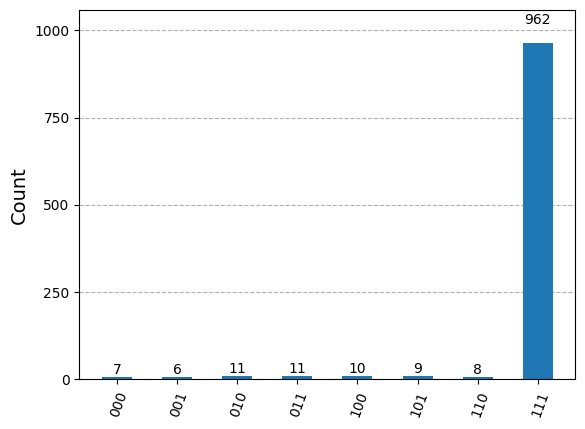

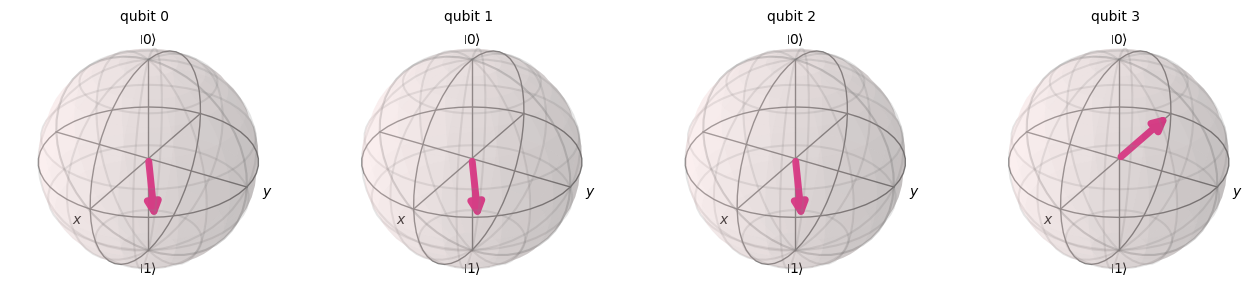

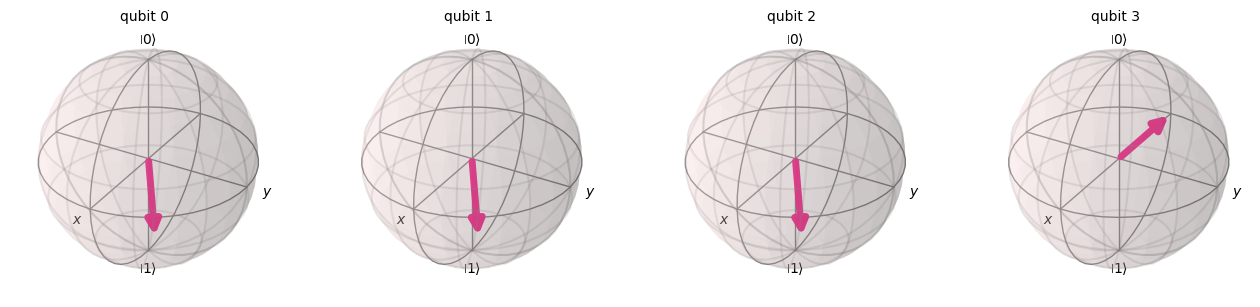

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
counts, osv, dsv = grover(3, [[1,1,1]])
plot_histogram(counts)
plt.show()
plot_bloch_multivector(osv)
plot_bloch_multivector(dsv)